In [6]:
import os
import sklearn
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

tf.random.set_seed(42)

filename = 'D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v2/Data/210903_70ms_3ea_Data_merge.csv'
SD = pd.read_csv(filename)
SD=SD.iloc[:,:28]
SensorData = SD

In [7]:
SD.describe()

Sx00          Sx01          Sx02          Sx03          Sx04  \
count  76027.000000  76027.000000  76027.000000  76027.000000  76027.000000   
mean      50.634221     46.107487     44.437254     48.798677     51.369406   
std        2.540823      1.879420      2.061734      1.925214      2.529280   
min       27.150000     30.730000     27.250000     34.600000     29.950000   
25%       49.190000     45.170000     43.270000     47.950000     50.630000   
50%       51.510000     45.930000     45.050000     48.840000     51.570000   
75%       51.510000     47.450000     45.940000     49.730000     52.510000   
max       58.470000     52.770000     50.390000     55.070000     60.030000   

               Sx05          Sx06          Sx07          Sx08          Sx09  \
count  76027.000000  76027.000000  76027.000000  76027.000000  76027.000000   
mean      47.913731     26.804731     48.734451     47.291521     48.588306   
std        2.778589      2.737502      2.260827      2.016625      1.955380   
min       25.350000      7.400000     28.460000     27.900000     30.660000   
25%       47.430000     25.450000     47.360000     46.100000     47.950000   
50%       48.390000     27.350000     49.160000     47.920000     48.860000   
75%       49.350000     28.300000     50.060000     48.830000     49.770000   
max       57.030000     36.850000     56.360000     54.290000     55.230000   

       ...          Sx12          Sx13          Sx14          Sx15  \
count  ...  76027.000000  76027.000000  76027.000000  76027.000000   
mean   ...     47.234670     46.869352     47.386356     46.442855   
std    ...      1.926617      2.247358      2.188792      2.093028   
min    ...     28.990000     30.600000     28.720000     29.780000   
25%    ...     46.280000     45.600000     46.780000     45.800000   
50%    ...     47.190000     46.600000     47.640000     46.690000   
75%    ...     48.100000     48.600000     48.500000     47.580000   
max    ...     53.560000     54.600000     54.520000     53.810000   

               Sx16          Sx17             r         theta     theta_enc  \
count  76027.000000  76027.000000  76027.000000  76027.000000  76027.000000   
mean      43.929142     50.285427      0.999987    174.996646    181.084112   
std        2.363662      2.231598      0.447209    103.884810    104.863948   
min       24.180000     32.040000      0.400000      0.000000      0.000000   
25%       43.370000     48.950000      0.600000     80.000000     90.880000   
50%       44.380000     50.730000      0.800000    180.000000    180.220000   
75%       45.390000     51.620000      1.200000    260.000000    273.470000   
max       51.450000     56.960000      1.600000    350.000000    359.960000   

                  z  
count  76027.000000  
mean      49.999342  
std       31.622756  
min        0.000000  
25%       20.000000  
50%       50.000000  
75%       80.000000  
max      100.000000  

[8 rows x 28 columns]

In [8]:
SDext =SD # SensorData[SensorData['z']==0]
mask = SDext["r"].isin([0.4])
SD = SDext[~mask]
SD.sample(10)

Sx00   Sx01   Sx02   Sx03   Sx04   Sx05   Sx06   Sx07   Sx08   Sx09  \
44992  51.51  44.41  44.16  49.73  52.51  50.31  29.25  49.16  48.83  47.95   
1094   49.19  45.93  45.94  50.62  53.45  50.31  28.30  49.16  47.92  48.86   
46012  50.35  48.21  45.05  48.84  50.63  50.31  30.20  48.26  47.92  52.50   
75006  54.99  46.69  40.60  50.62  53.45  48.39  26.40  49.16  47.92  48.86   
5068   51.51  46.69  45.05  47.95  51.57  50.31  27.35  46.46  47.01  48.86   
3157   51.51  47.45  45.94  48.84  49.69  50.31  26.40  49.16  47.92  46.13   
63087  50.35  46.69  45.94  50.62  55.33  48.39  27.35  49.16  48.83  48.86   
39466  45.71  48.21  45.94  48.84  49.69  50.31  30.20  44.66  49.74  47.95   
19167  52.67  42.89  46.83  49.73  53.45  48.39   7.40  45.56  48.83  51.59   
26971  50.35  45.93  45.05  47.06  38.41  49.35  27.35  50.06  48.83  48.86   

       ...   Sx12  Sx13   Sx14   Sx15   Sx16   Sx17    r  theta  theta_enc  \
44992  ...  48.10  46.6  47.64  46.69  43.37  48.95  0.8    180     163.26   
1094   ...  46.28  45.6  46.78  44.91  37.31  53.40  1.2     50      51.72   
46012  ...  47.19  44.6  45.92  44.02  43.37  50.73  1.2    230     214.32   
75006  ...  47.19  42.6  47.64  47.58  44.38  50.73  1.2    300     303.79   
5068   ...  46.28  49.6  45.92  45.80  43.37  53.40  0.8    260     264.02   
3157   ...  45.37  47.6  47.64  47.58  46.40  50.73  0.8    160     160.93   
63087  ...  49.92  48.6  49.36  47.58  43.37  48.95  1.2     40      35.82   
39466  ...  48.10  45.6  48.50  46.69  44.38  49.84  1.2    250     246.09   
19167  ...  48.10  45.6  45.92  49.36  43.37  49.84  1.6    270     283.32   
26971  ...  46.28  45.6  45.92  47.58  46.40  51.62  0.8    320     342.86   

         z  
44992   60  
1094     0  
46012   60  
75006  100  
5068     0  
3157     0  
63087   90  
39466   50  
19167   20  
26971   30  

[10 rows x 28 columns]

In [9]:
import numpy as np
toRad = np.pi/180 
SD['cos']=np.cos(SD.theta_enc*toRad)
SD['sin']=np.sin(SD.theta_enc*toRad)
SD['r'] = (SD['r']-1.2)/0.4
SD['z'] = (SD['z']-50)/50

<ipython-input-9-b800ae39c7f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SD['cos']=np.cos(SD.theta_enc*toRad)
<ipython-input-9-b800ae39c7f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SD['sin']=np.sin(SD.theta_enc*toRad)
<ipython-input-9-b800ae39c7f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [10]:
SD

Sx00   Sx01   Sx02   Sx03   Sx04   Sx05   Sx06   Sx07   Sx08   Sx09  \
48     51.51  47.45  43.27  48.84  46.87  50.31  25.45  49.16  46.10  47.04   
49     50.35  45.93  45.05  47.06  47.81  52.23  27.35  46.46  46.10  48.86   
50     51.51  45.93  45.05  47.06  50.63  48.39  25.45  49.16  48.83  49.77   
51     51.51  45.93  45.05  47.95  48.75  49.35  26.40  50.96  47.92  49.77   
52     50.35  46.69  45.05  48.84  50.63  47.43  27.35  48.26  48.83  48.86   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
76022  51.51  47.45  45.05  41.72  50.63  50.31  28.30  48.26  47.92  48.86   
76023  50.35  48.21  46.83  40.83  48.75  49.35  27.35  50.06  47.01  47.95   
76024  49.19  48.97  45.94  44.39  46.87  48.39  30.20  48.26  47.92  47.04   
76025  51.51  49.73  46.83  42.61  50.63  49.35  29.25  50.06  47.92  46.13   
76026  50.35  48.97  47.72  43.50  47.81  45.51  25.45  50.06  47.92  47.95   

       ...   Sx14   Sx15   Sx16   Sx17    r  theta  theta_enc    z       cos  \
48     ...  48.50  47.58  45.39  48.95 -1.0      0     359.96 -1.0  1.000000   
49     ...  46.78  46.69  44.38  48.95 -1.0      0     359.96 -1.0  1.000000   
50     ...  46.78  47.58  43.37  48.95 -1.0      0     359.96 -1.0  1.000000   
51     ...  45.92  44.91  44.38  50.73 -1.0      0     359.96 -1.0  1.000000   
52     ...  45.06  47.58  47.41  48.06 -1.0      0     359.96 -1.0  1.000000   
...    ...    ...    ...    ...    ...  ...    ...        ...  ...       ...   
76022  ...  47.64  48.47  45.39  48.06  1.0    350     352.71  1.0  0.991917   
76023  ...  46.78  45.80  44.38  50.73  1.0    350     352.71  1.0  0.991917   
76024  ...  48.50  49.36  47.41  49.84  1.0    350     352.71  1.0  0.991917   
76025  ...  47.64  48.47  47.41  52.51  1.0    350     352.71  1.0  0.991917   
76026  ...  45.06  47.58  42.36  51.62  1.0    350     352.71  1.0  0.991917   

            sin  
48    -0.000698  
49    -0.000698  
50    -0.000698  
51    -0.000698  
52    -0.000698  
...         ...  
76022 -0.126891  
76023 -0.126891  
76024 -0.126891  
76025 -0.126891  
76026 -0.126891  

[57020 rows x 30 columns]

In [11]:
SDz=(SD.loc[:,'z'])
SDz.plot()

<AxesSubplot:>

In [12]:
SDy = SD.iloc[:,24:30]
SDy.describe()

r         theta     theta_enc             z           cos  \
count  57020.000000  57020.000000  57020.000000  57020.000000  57020.000000   
mean      -0.000035    174.996317    181.106585      0.000007      0.012031   
std        0.816489    103.883070    104.863246      0.632460      0.710187   
min       -1.000000      0.000000      0.000000     -1.000000     -1.000000   
25%       -1.000000     80.000000     90.880000     -0.600000     -0.697790   
50%        0.000000    175.000000    180.815000      0.000000      0.015357   
75%        1.000000    260.000000    273.470000      0.600000      0.729566   
max        1.000000    350.000000    359.960000      1.000000      1.000000   

                sin  
count  57020.000000  
mean       0.001943  
std        0.703920  
min       -0.999999  
25%       -0.694533  
50%       -0.002269  
75%        0.708709  
max        0.999995

In [828]:
%matplotlib inline
import matplotlib.pyplot as plt
SD.hist(bins=30, figsize=(20,15))
plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v2/savefig/210903_70ms_3ea_hist.png')
plt.show()

<AxesSubplot:xlabel='z', ylabel='Sx02'>

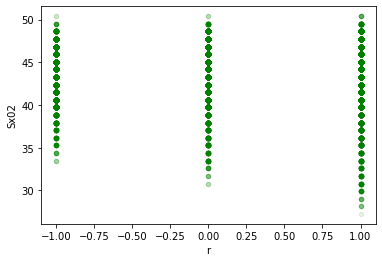

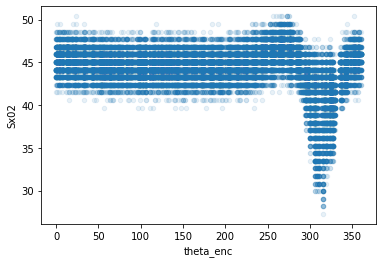

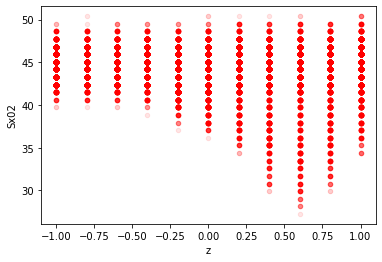

In [13]:
i = 2
SD.plot(kind="scatter", x= "r",y= "Sx"+format(i,'02X'),alpha = 0.1,color='green')
SD.plot(kind="scatter", x= "theta_enc",y= "Sx"+format(i,'02X'),alpha = 0.1)
SD.plot(kind="scatter", x= "z",y= "Sx"+format(i,'02X'),alpha = 0.1,color='red')

In [14]:
X = SD.iloc[:,:24]
y = SD.iloc[:,[24,27,28,29]]

In [15]:
X

Sx00   Sx01   Sx02   Sx03   Sx04   Sx05   Sx06   Sx07   Sx08   Sx09  \
48     51.51  47.45  43.27  48.84  46.87  50.31  25.45  49.16  46.10  47.04   
49     50.35  45.93  45.05  47.06  47.81  52.23  27.35  46.46  46.10  48.86   
50     51.51  45.93  45.05  47.06  50.63  48.39  25.45  49.16  48.83  49.77   
51     51.51  45.93  45.05  47.95  48.75  49.35  26.40  50.96  47.92  49.77   
52     50.35  46.69  45.05  48.84  50.63  47.43  27.35  48.26  48.83  48.86   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
76022  51.51  47.45  45.05  41.72  50.63  50.31  28.30  48.26  47.92  48.86   
76023  50.35  48.21  46.83  40.83  48.75  49.35  27.35  50.06  47.01  47.95   
76024  49.19  48.97  45.94  44.39  46.87  48.39  30.20  48.26  47.92  47.04   
76025  51.51  49.73  46.83  42.61  50.63  49.35  29.25  50.06  47.92  46.13   
76026  50.35  48.97  47.72  43.50  47.81  45.51  25.45  50.06  47.92  47.95   

       ...   Sx0E   Sx0F   Sx10   Sx11   Sx12  Sx13   Sx14   Sx15   Sx16  \
48     ...  47.90  47.60  45.07  49.62  48.10  47.6  48.50  47.58  45.39   
49     ...  51.26  48.49  43.25  47.88  49.01  49.6  46.78  46.69  44.38   
50     ...  48.74  48.49  42.34  47.88  49.01  46.6  46.78  47.58  43.37   
51     ...  47.06  50.27  45.98  48.75  47.19  47.6  45.92  44.91  44.38   
52     ...  49.58  50.27  43.25  48.75  49.01  46.6  45.06  47.58  47.41   
...    ...    ...    ...    ...    ...    ...   ...    ...    ...    ...   
76022  ...  47.90  47.60  41.43  50.49  47.19  50.6  47.64  48.47  45.39   
76023  ...  47.90  49.38  42.34  48.75  46.28  46.6  46.78  45.80  44.38   
76024  ...  47.90  49.38  42.34  47.88  48.10  45.6  48.50  49.36  47.41   
76025  ...  46.22  49.38  40.52  50.49  47.19  47.6  47.64  48.47  47.41   
76026  ...  47.06  51.16  40.52  49.62  45.37  47.6  45.06  47.58  42.36   

        Sx17  
48     48.95  
49     48.95  
50     48.95  
51     50.73  
52     48.06  
...      ...  
76022  48.06  
76023  50.73  
76024  49.84  
76025  52.51  
76026  51.62  

[57020 rows x 24 columns]

In [16]:
y.sample(5)

r    z       cos       sin
11057  0.0 -0.8 -0.807269 -0.590183
29502  0.0 -0.2 -0.104876  0.994485
29717  1.0 -0.2 -0.228861  0.973459
30142  1.0 -0.2 -0.551791  0.833982
46755  0.0  0.2 -0.245138 -0.969488

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.01, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2, random_state=42)

In [18]:
X_sum = len(X_train)+len(X_valid)+len(X_test)
X_train_per = int(len(X_train)/X_sum*100)
X_valid_per = int(len(X_valid)/X_sum*100)
X_test_per = int(len(X_test)/X_sum*100)

print('X_train: ',len(X_train),'ea',X_train_per,'%   ', 
      'X_valid: ',len(X_valid),'ea',X_valid_per,'%   ',
      'X_test: ',len(X_test),'ea',X_test_per,'%',)

X_train:  45159 ea 79 %    X_valid:  11290 ea 19 %    X_test:  571 ea 1 %


In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [20]:
import pickle
from joblib import dump, load

file_name = 'myScaler/210903_70ms_Mean3_SS.pkl'
dump(scaler, file_name)

['myScaler/210903_70ms_Mean3_SS.pkl']

In [21]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Dense(256, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(256, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(128, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(128, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(16, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(16, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(4))
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))


In [953]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_335 (Dense)            (None, 256)               6400      
_________________________________________________________________
dense_336 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_337 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_338 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_339 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_340 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_341 (Dense)            (None, 32)              

## Callback (best, early stopping, tensorboard)

In [954]:
import os 
root_logdir = os.path.join(os.curdir, "mylog/210903_70ms_3ea")

def get_run_logdir():
    import time
    run_id= time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [955]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=500,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:5]
y_pred = model.predict(X_new)

Epoch 1/500
1412/1412 [==============================] - 3s 2ms/step - loss: 0.5162 - val_loss: 0.5177
Epoch 2/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.5153 - val_loss: 0.5169
Epoch 3/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.5148 - val_loss: 0.5164
Epoch 4/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.5143 - val_loss: 0.5157
Epoch 5/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.5135 - val_loss: 0.5148
Epoch 6/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.5126 - val_loss: 0.5137
Epoch 7/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.5111 - val_loss: 0.5116
Epoch 8/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.5089 - val_loss: 0.5091
Epoch 9/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.5059 - val_loss: 0.5053
Epoch 10/500
1412/1412 [==============================] - 2s 2ms/step - l

Epoch 80/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.1277 - val_loss: 0.1336
Epoch 81/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.1268 - val_loss: 0.1331
Epoch 82/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.1259 - val_loss: 0.1320
Epoch 83/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.1252 - val_loss: 0.1315
Epoch 84/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.1244 - val_loss: 0.1320
Epoch 85/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.1238 - val_loss: 0.1301
Epoch 86/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.1232 - val_loss: 0.1295
Epoch 87/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.1226 - val_loss: 0.1308
Epoch 88/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.1220 - val_loss: 0.1289
Epoch 89/500
1412/1412 [==============================] - 2s 2ms

1412/1412 [==============================] - 2s 2ms/step - loss: 0.0926 - val_loss: 0.1160
Epoch 237/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.0925 - val_loss: 0.1165
Epoch 238/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.0924 - val_loss: 0.1160
Epoch 239/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.0923 - val_loss: 0.1162
Epoch 240/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.0921 - val_loss: 0.1156
Epoch 241/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.0920 - val_loss: 0.1156
Epoch 242/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.0919 - val_loss: 0.1170
Epoch 243/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.0917 - val_loss: 0.1158
Epoch 244/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.0916 - val_loss: 0.1188
Epoch 245/500
1412/1412 [==============================] - 2s 2ms/ste

1412/1412 [==============================] - 2s 2ms/step - loss: 0.0728 - val_loss: 0.1259
Epoch 393/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.0726 - val_loss: 0.1262
Epoch 394/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.0727 - val_loss: 0.1242
Epoch 395/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.0725 - val_loss: 0.1262
Epoch 396/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.0723 - val_loss: 0.1343
Epoch 397/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.0723 - val_loss: 0.1271
Epoch 398/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.0721 - val_loss: 0.1282
Epoch 399/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.0721 - val_loss: 0.1245
Epoch 400/500
1412/1412 [==============================] - 2s 2ms/step - loss: 0.0717 - val_loss: 0.1281
Epoch 401/500
1412/1412 [==============================] - 2s 2ms/ste

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./mylog/210903_70ms_3ea --port=09031

In [972]:
model.save("D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v2/myModel/210903_70ms_3ea_4.h5")

In [22]:
model = tf.keras.models.load_model('myModel/210903_70ms_3ea_4.h5')
scaler = load('myScaler/210903_70ms_Mean3_SS.pkl')
valid_predictions = model.predict(X_valid)

In [23]:
X_valid

array([[-0.08093329, -0.82502907, -4.14915605, ..., -0.6701899 ,
        -0.60960019, -0.16569441],
       [ 0.33979496, -0.06570269,  0.68826183, ...,  1.32222006,
         0.5844892 ,  0.20871609],
       [-1.34311802, -0.44536588, -0.11797448, ...,  0.52525608,
        -0.21157039,  0.58312659],
       ...,
       [ 0.33979496, -0.82502907, -4.14915605, ...,  0.12677408,
         0.18645941, -0.16569441],
       [ 0.33979496, -1.20469227,  0.68826183, ...,  0.12677408,
         0.18645941, -0.54010491],
       [-0.08093329,  0.3139605 ,  0.28514368, ..., -0.27170791,
         0.982519  , -0.54010491]])

In [24]:
valid_predictions

array([[ 0.90968555,  0.24747041,  0.67376876, -0.7078916 ],
       [-1.0858263 , -0.38400957,  0.77723444, -0.23995754],
       [ 0.9333609 , -0.5186609 , -0.24639758, -1.0057416 ],
       ...,
       [-0.529111  ,  0.34749728,  0.56187814, -0.8301792 ],
       [-0.27734703, -0.55983555,  0.07282408, -1.0941297 ],
       [ 0.87309515,  0.8982322 , -0.14074756,  0.99954045]],
      dtype=float32)

In [25]:
valid_predictions_df=pd.DataFrame(valid_predictions)

In [26]:
valid_predictions_df.columns = ["valid_r","valid_z","valid_cos","valid_sin"]
#x2=valid_predictions_df["valid_cos"]
#x1=valid_predictions_df["valid_sin"]
#valid_predictions_df["valid_theta"] = np.arctan2(x1, x2)
#valid_predictions_df

In [28]:
k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
k_df.columns  = ["r","z","cos","sin"]
k_df

r    z       cos       sin
0      0.0  0.4  0.647322 -0.762217
1     -1.0 -1.0  0.994810 -0.101751
2      1.0 -0.6 -0.303534 -0.952821
3     -1.0  0.8  0.996118  0.088025
4      0.0  0.0 -0.238533 -0.971134
...    ...  ...       ...       ...
11285  1.0  0.0 -0.911403 -0.411514
11286 -1.0  0.2 -0.245138 -0.969488
11287 -1.0  0.4  0.647322 -0.762217
11288 -1.0 -0.6  0.230389 -0.973099
11289  1.0  1.0 -0.055124  0.998479

[11290 rows x 4 columns]

In [48]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
for i in range(0,4):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr

corr
68.78% r
87.61% z
96.57% cos
96.51% sin


r         z       cos       sin   valid_r   valid_z  \
r          1.000000 -0.000547  0.008557  0.003253  0.687808  0.013302   
z         -0.000547  1.000000 -0.001183  0.007011  0.002076  0.876073   
cos        0.008557 -0.001183  1.000000 -0.018889  0.013218 -0.005725   
sin        0.003253  0.007011 -0.018889  1.000000  0.034306  0.005845   
valid_r    0.687808  0.002076  0.013218  0.034306  1.000000  0.007633   
valid_z    0.013302  0.876073 -0.005725  0.005845  0.007633  1.000000   
valid_cos  0.006951  0.001960  0.965692 -0.023377  0.008568 -0.006057   
valid_sin  0.006986  0.001978 -0.011933  0.965122  0.034923  0.009333   

           valid_cos  valid_sin  
r           0.006951   0.006986  
z           0.001960   0.001978  
cos         0.965692  -0.011933  
sin        -0.023377   0.965122  
valid_r     0.008568   0.034923  
valid_z    -0.006057   0.009333  
valid_cos   1.000000  -0.016125  
valid_sin  -0.016125   1.000000

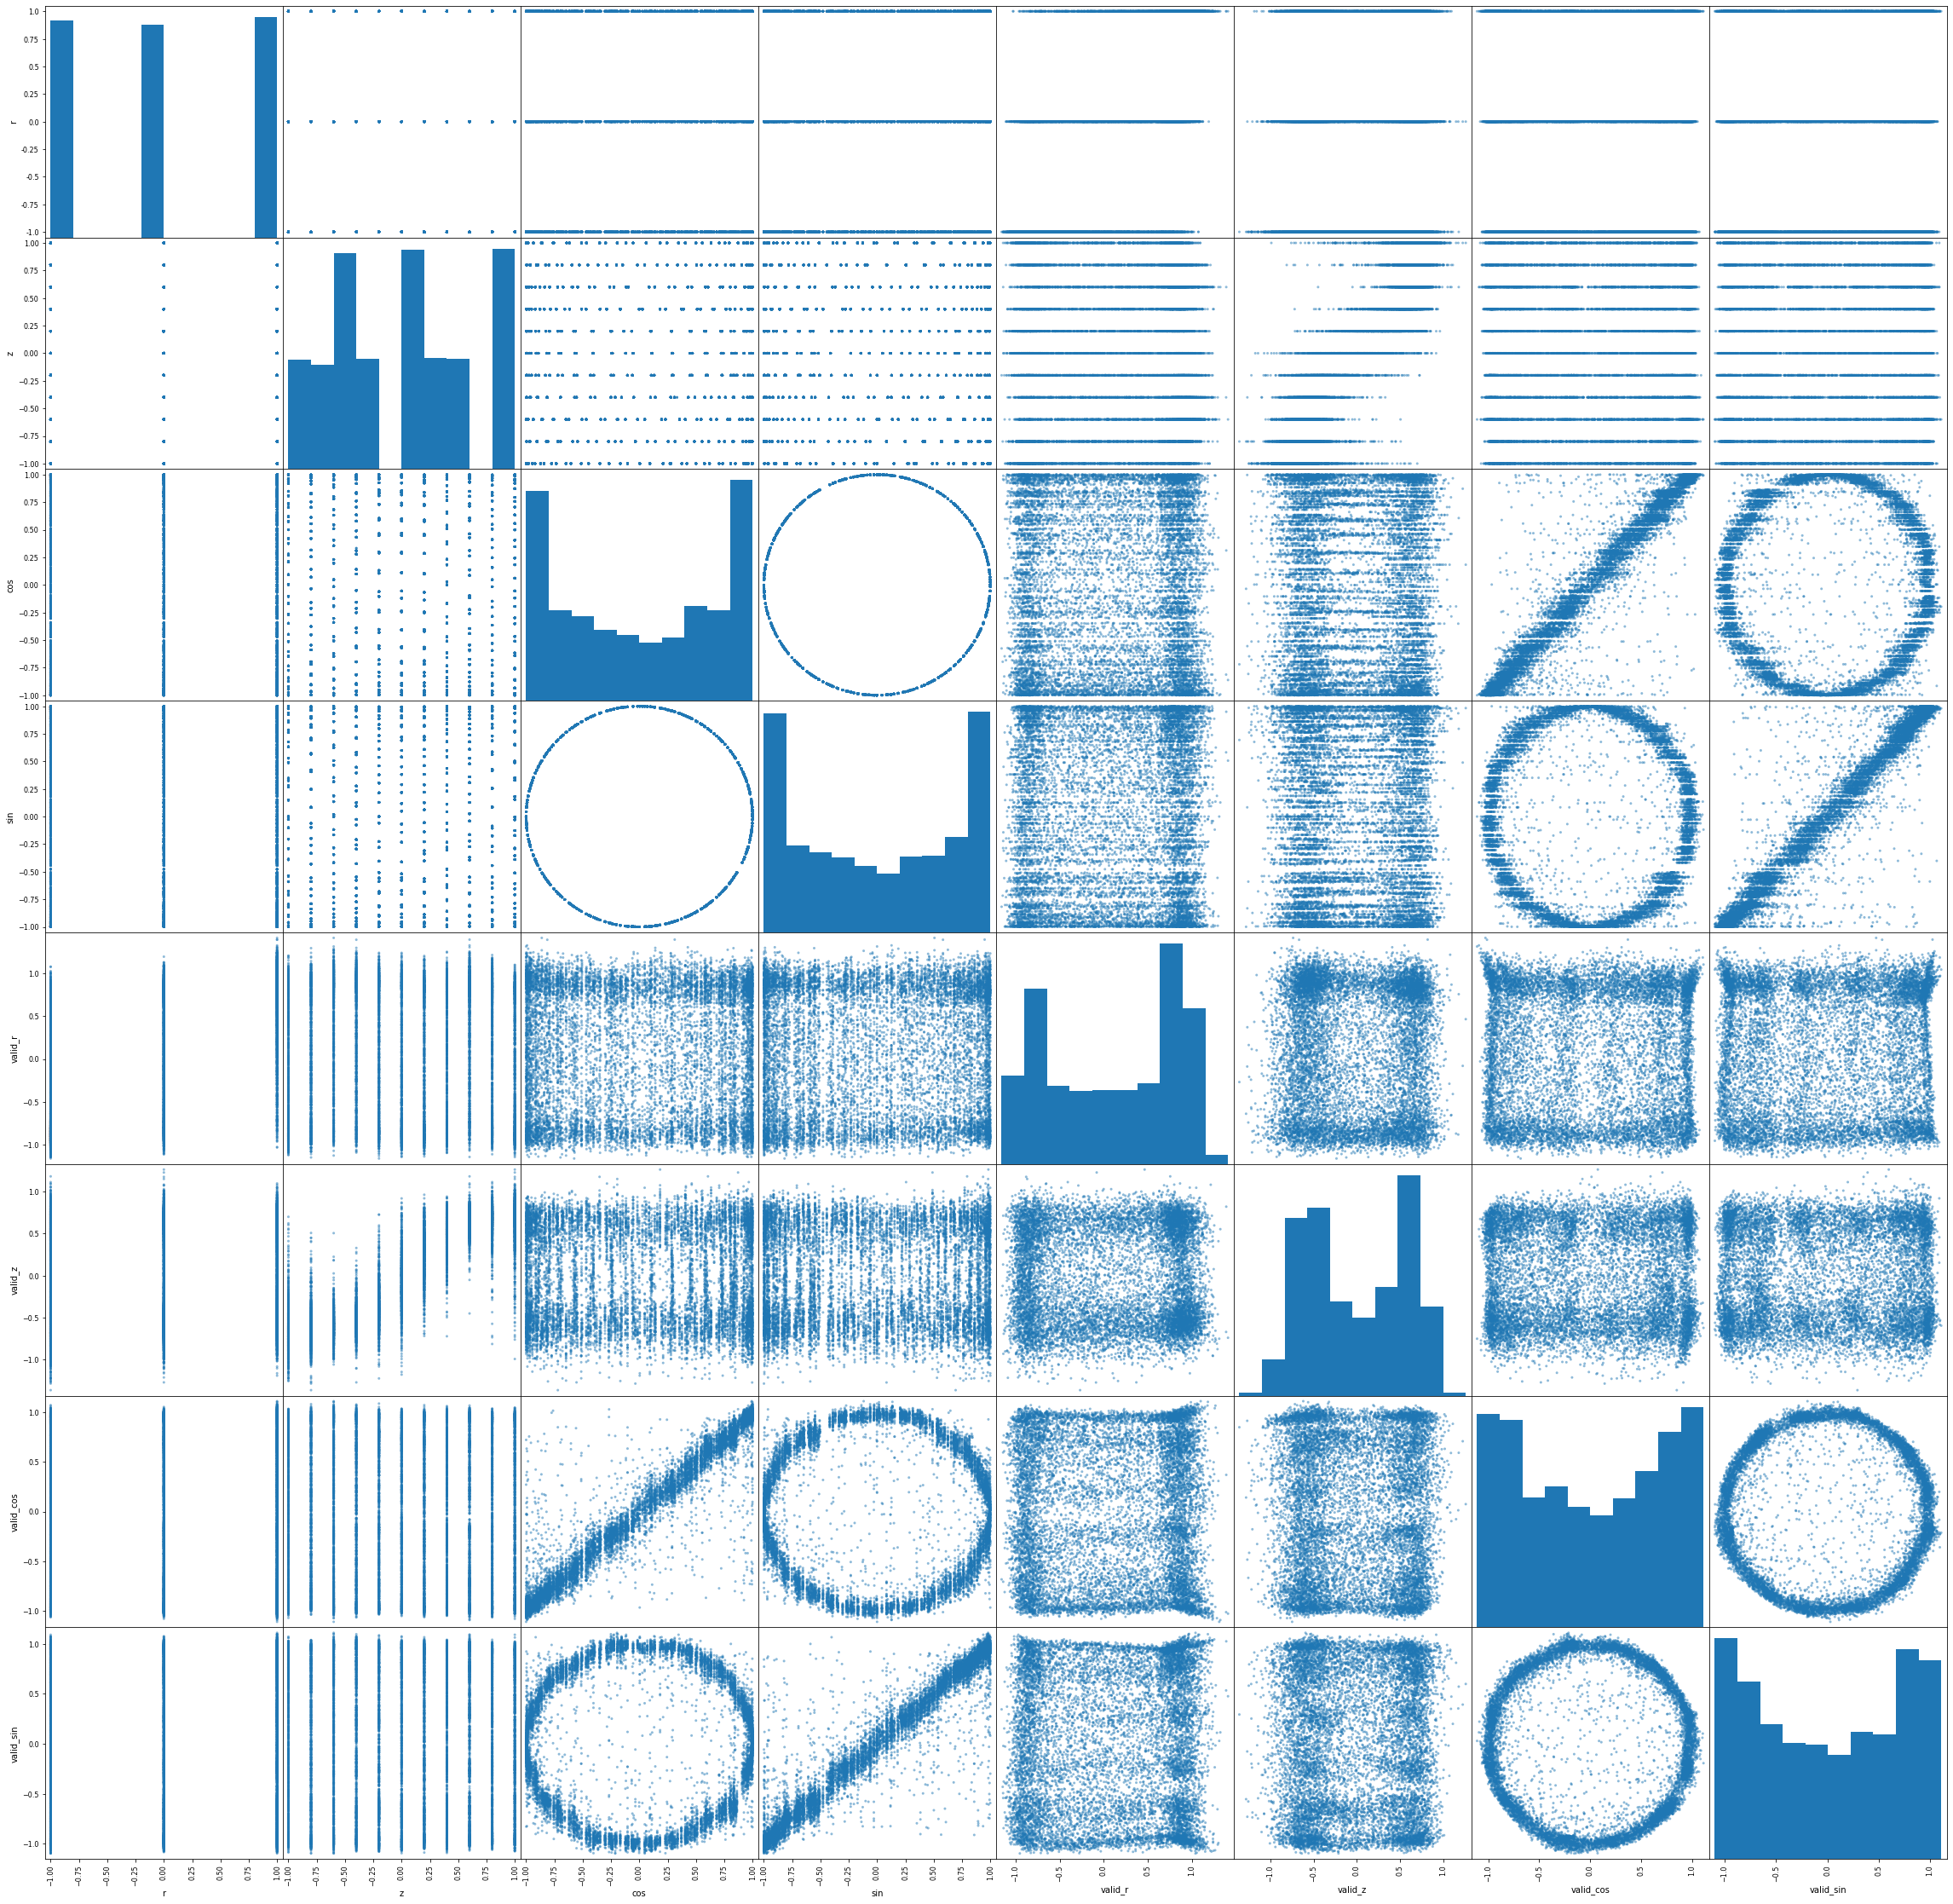

In [51]:
from pandas.plotting import scatter_matrix
scatter_matrix(ValidPre,figsize=(40,40))
plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v2/savefig/210903_70ms_3ea_scatter.png')

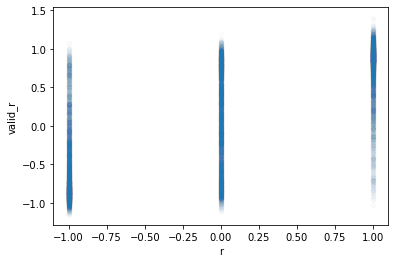

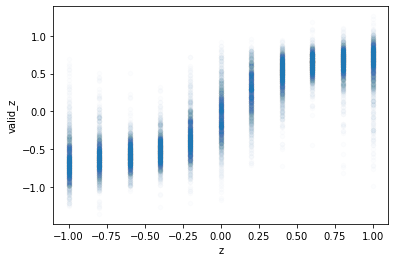

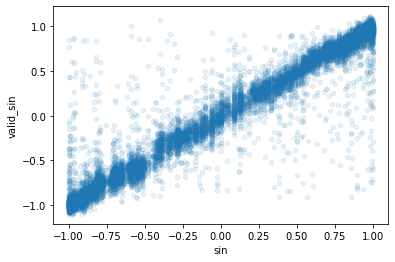

In [30]:
ValidPre.plot(kind="scatter", x= "r",y= "valid_r",alpha = 0.01)
ValidPre.plot(kind="scatter", x= "z",y= "valid_z",alpha = 0.01)
ValidPre.plot(kind="scatter", x= "cos",y= "valid_cos",alpha = 0.1)
ValidPre.plot(kind="scatter", x= "sin",y= "valid_sin",alpha = 0.1)
plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v2/savefig/210903_70ms_3ea_sin.png')